In [ ]:
"""
The Collatz sequence is defined as: 
 
a
i
+
1
=
{
a
i
2
3
a
i
+
1
if 
a
i
 is even
if 
a
i
 is odd
.

The Collatz conjecture states that starting from any positive integer, the sequence eventually reaches the cycle 1,4,2,1....
We shall define the sequence prefix p(n) for the Collatz sequence starting with a1 = n as the sub-sequence of all numbers not a power of 2 (20=1 is considered a power of 2 for this problem). For example:
p(13) = {13, 40, 20, 10, 5} 
p(8) = {}
Any number invalidating the conjecture would have an infinite length sequence prefix.

Let Sm be the set of all sequence prefixes of length m. Two sequences {a1, a2, ..., am} and {b1, b2, ..., bm} in Sm are said to belong to the same prefix family if ai < aj if and only if bi < bj for all 1 ≤ i,j ≤ m.

For example, in S4, {6, 3, 10, 5} is in the same family as {454, 227, 682, 341}, but not {113, 340, 170, 85}.
Let f(m) be the number of distinct prefix families in Sm.
You are given f(5) = 5, f(10) = 55, f(20) = 6771.

Find f(90).
"""

In [6]:
from math import log2

In [7]:
def collatz_seq(n, cut_off):
    seq = []
    while len(seq) <= cut_off:
        if log2(n).is_integer():
            return tuple(seq)
        else:
            seq += [n]
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
    else:
        return None

In [8]:
import numpy as np

In [9]:
def seq_family(sq1, sq2):
    sq1 = np.array([sq1[i] < sq1 for i in range(len(sq1))])
    sq2 = np.array([sq2[i] < sq2 for i in range(len(sq2))])
    
    return not np.logical_xor(sq1, sq2).any()

In [10]:
import matplotlib.pyplot as plt

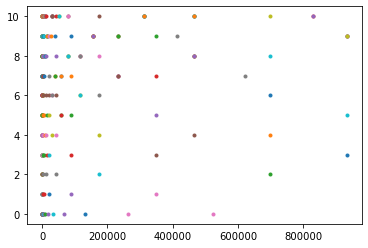

In [16]:
for i in range(1, 1000000):
    sq = collatz_seq(i, 10)
    if sq != None:
        plt.plot(i, len(sq), '.')

In [23]:
set_5 = []
max_range = 10000000
for i in range(1, max_range):
    if i % (max_range // 10) == 0:
        print(100 * i // max_range, end = '%\r')
    sq = collatz_seq(i, 5)
    if sq != None and len(sq) == 5:
        set_5 += [sq]

In [24]:
len(set_5)

21

In [38]:
set_10 = []
max_range = 100000000
for i in range(1, max_range):
    if i % (max_range // 10) == 0:
        print(100 * i // max_range, end = '%\r')
    sq = collatz_seq(i, 10)
    if sq != None and len(sq) == 10:
        set_10 += [sq]

In [39]:
len(set_10)

66

In [25]:
set_20 = []
max_range = 10000000
for i in range(1, max_range):
    if i % (max_range // 10) == 0:
        print(100 * i // max_range, end = '%\r')
    sq = collatz_seq(i, 20)
    if sq != None and len(sq) == 20:
        set_20 += [sq]

In [26]:
len(set_20)

392

In [40]:
die_liste = set_10

In [43]:
def distinct_families(die_liste):
    categories = []

    for elem in die_liste:
        die_neue_liste = []
        category = []
        for elem2 in die_liste:
            if not seq_family(np.array(elem), np.array(elem2)):
                die_neue_liste += [elem2]
            else:
                category += [elem2]
        if len(category) > 0:
            categories += [category]
        die_liste = die_neue_liste
    
    return len(categories)

In [44]:
distinct_families(set_10)

40

In [51]:
lst1 = []
lst2 = []

set_20 = []
max_range = 10000000
for i in range(1, max_range):
    if i % (max_range // 10) == 0:
        print(100 * i // max_range, end = '%\r')
    sq = collatz_seq(i, 20)
    if sq != None and len(sq) == 20:
        set_20 += [sq]
    if i % 10000 == 0:
        lst1 += [i]
        lst2 += [distinct_families(set_20)]

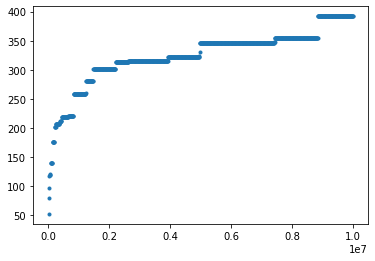

In [52]:

plt.plot(lst1, lst2,'.')